<a href="https://colab.research.google.com/github/jtamas0705/learnpytorch/blob/main/02_pytorch_neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

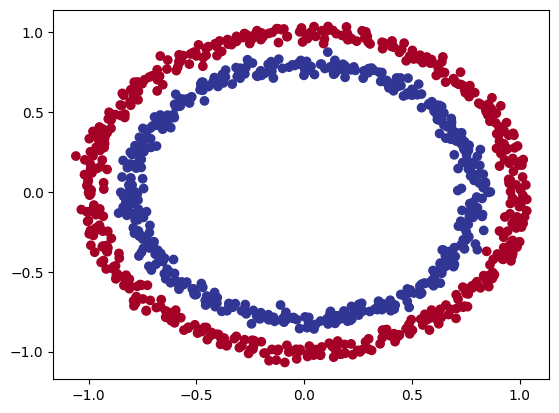

In [2]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [3]:
# Convert data to tensors

import torch
from sklearn.model_selection import train_test_split


# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split train and test sets
X_train, X_test, y_train, y_test = train_test_split(X.to(device),
                                                    y.to(device),
                                                    test_size=0.2,
                                                    random_state=42
                                                    )


In [4]:
### 6.2 Building a model with non-linearity

from torch import nn

class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1000)
        self.layer_4 = nn.Linear(in_features=1000, out_features=100)
        self.layer_5 = nn.Linear(in_features=100, out_features=10)
        self.layer_6 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.layer_6(self.relu(self.layer_5(self.relu(self.layer_4(self.relu(self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))))))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1000, bias=True)
  (layer_4): Linear(in_features=1000, out_features=100, bias=True)
  (layer_5): Linear(in_features=100, out_features=10, bias=True)
  (layer_6): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [5]:
# Implementing training loop

from torch import optim

# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

loss_fn = nn.BCEWithLogitsLoss()

optimizer = optim.SGD(params=model_3.parameters(),
                      lr=0.1)

EPOCHS = 1000
torch.manual_seed(42)
torch.cuda.manual_seed(42)

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(EPOCHS):
  model_3.train()

  # Forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # Calculate the loss
  loss = loss_fn(y_logits, y_train)
  accuracy = accuracy_fn(y_true=y_train,
                         y_pred=y_pred)

  # Zero grad optimizer
  optimizer.zero_grad()

  # Loss backwards
  loss.backward()

  # Optimizer step
  optimizer.step()

  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test)
    test_accuracy = accuracy_fn(y_true=y_test,
                         y_pred=test_pred)

    if epoch % 100 == 0:
      print(f"epoch {epoch} | loss {loss} Accuracy: {accuracy:2f}% | Test loss: {test_loss:2f} | test accuracy: {test_accuracy:.2f}%")


epoch 0 | loss 0.6947174072265625 Accuracy: 50.000000% | Test loss: 0.694609 | test accuracy: 50.00%
epoch 100 | loss 0.6930114030838013 Accuracy: 50.000000% | Test loss: 0.693095 | test accuracy: 50.00%
epoch 200 | loss 0.6928553581237793 Accuracy: 58.125000% | Test loss: 0.693000 | test accuracy: 57.00%
epoch 300 | loss 0.6926526427268982 Accuracy: 57.125000% | Test loss: 0.692882 | test accuracy: 58.00%
epoch 400 | loss 0.6923500895500183 Accuracy: 57.125000% | Test loss: 0.692720 | test accuracy: 56.00%
epoch 500 | loss 0.6916725039482117 Accuracy: 54.250000% | Test loss: 0.692398 | test accuracy: 51.50%
epoch 600 | loss 0.69052654504776 Accuracy: 54.625000% | Test loss: 0.691840 | test accuracy: 51.00%
epoch 700 | loss 0.6882417798042297 Accuracy: 54.625000% | Test loss: 0.690749 | test accuracy: 51.50%
epoch 800 | loss 0.682502269744873 Accuracy: 55.875000% | Test loss: 0.688031 | test accuracy: 52.00%
epoch 900 | loss 0.6570619344711304 Accuracy: 70.375000% | Test loss: 0.672496

Text(0.5, 1.0, 'Test')

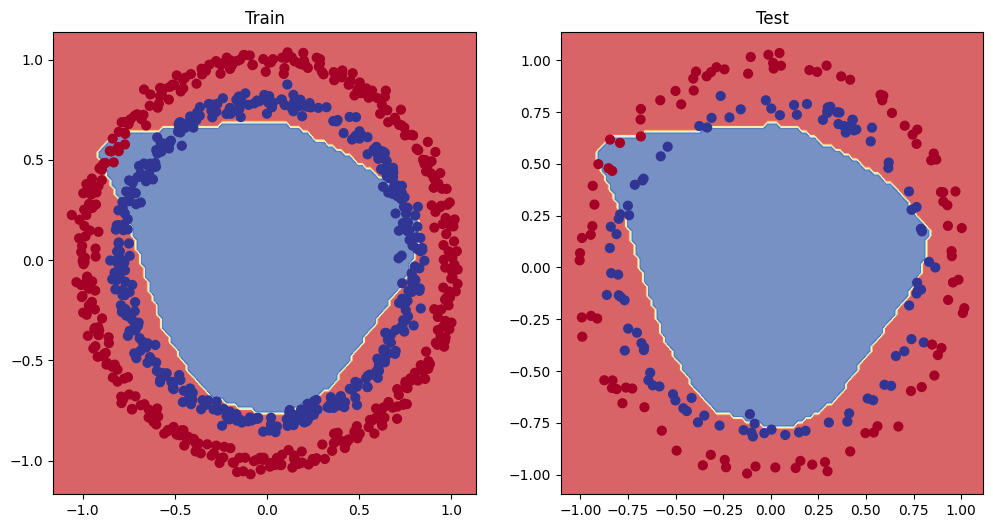

In [6]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

# Evaluateing a model trained with non-limear activation functions
model_3.eval()
with torch.inference_mode():
  y_logits = model_3(X_test).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))
  y_preds[:10], y_test[:10]

# Plot decisiion boundaries
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plot_decision_boundary(model_3, X_test, y_test)
plt.title("Test")


In [7]:
# Create tensor
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A.dtype

torch.float32

In [8]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

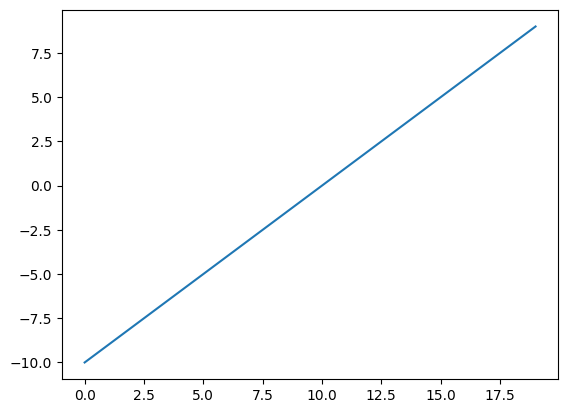

In [9]:
# Visualize data
plt.plot(A)

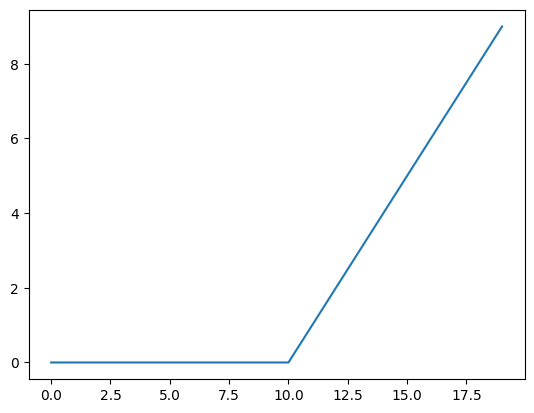

In [10]:
plt.plot(torch.relu(A))

In [11]:
def relu(x: torch.Tensor) -> torch.Tensor:
  return torch.max(torch.tensor(0), x)

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

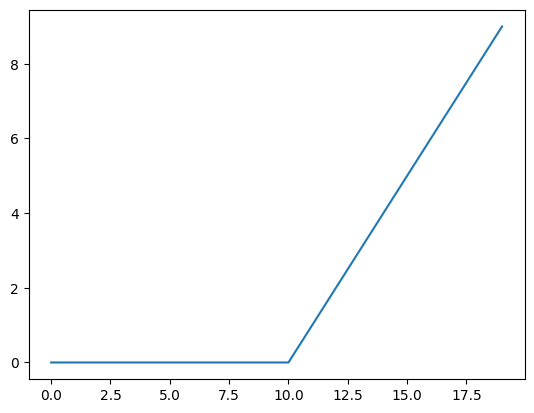

In [12]:
# Plot relu
plt.plot(relu(A))

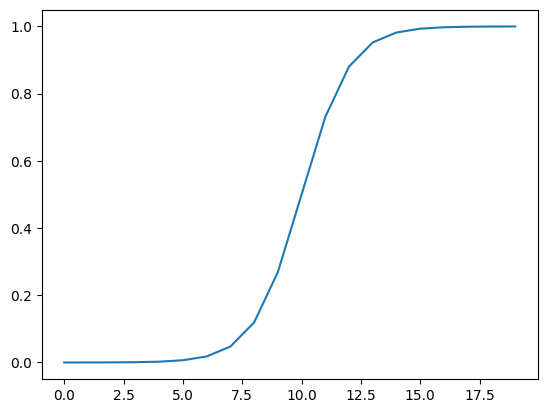

In [13]:
# Plot sigmoid

def sigmoid(x: torch.Tensor) -> torch.Tensor:
  return 1 / (1 + torch.exp(-x))

sigmoid(A)

plt.plot(sigmoid(A))

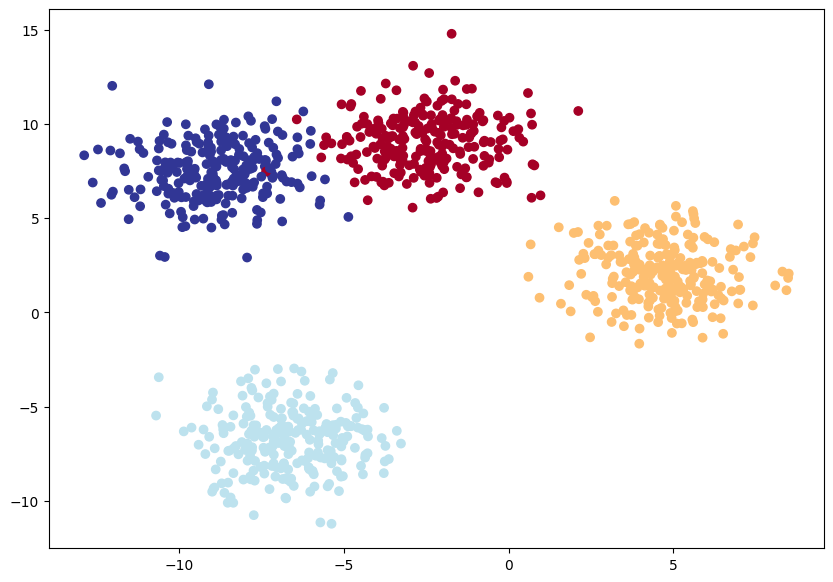

In [26]:
# Mulit-class classification

import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5, # give the clusters a bit of shake up
                            random_state=RANDOM_SEED)
# turn data inot tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# Split into train and test

X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED
                                                                        )
# plot the data

plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)



In [40]:
# Building a multi-class classification model in PyTorch

device = "cuda" if torch.cuda.is_available() else "cpu"
device

class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8) -> None:
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        # nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        # nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

X_blob_train.shape, y_blob_train[:5]

# Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [41]:
# Setting up the loss function and optimizer

loss_fn = nn.CrossEntropyLoss()

optim = torch.optim.SGD(params=model_4.parameters(),
                         lr=0.1)


In [42]:
# Getting prediction probabilities for a multi-class prediction
# Logits (raw outpuut of the model) -> Pred probabilities (use torch.softmay()) -> Pred labels (take the argmax of the prediction probabilities)
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))
  y_pred_probs = torch.softmax(y_logits, dim=1)
  print(y_logits[:5])
  print(y_pred_probs[:5])

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852]], device='cuda:0')
tensor([[0.1872, 0.2918, 0.1495, 0.3715],
        [0.2824, 0.0149, 0.2881, 0.4147],
        [0.3380, 0.0778, 0.4854, 0.0989],
        [0.2118, 0.3246, 0.1889, 0.2748],
        [0.1945, 0.0598, 0.1506, 0.5951]], device='cuda:0')


In [43]:
# Convert our model's prediction probabilities into prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([3, 3, 2, 1, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2,
        2, 2, 3, 3, 3, 3, 3, 1, 1, 2, 1, 2, 1, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3,
        3, 3, 1, 3, 3, 1, 3, 2, 3, 1, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 3, 3, 2, 3, 3, 3, 3, 2, 3, 1, 3, 3, 2, 1, 1, 3, 2, 2, 3, 3, 3, 1, 2,
        2, 3, 3, 1, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 1, 1, 3, 2, 2,
        2, 2, 3, 3, 3, 2, 2, 1, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3,
        2, 2, 2, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3,
        1, 3, 2, 3, 3, 1, 2, 3], device='cuda:0')

In [44]:

# Ft the multi-class model to the data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epocs

EPOCHS = 100

# Put data to the target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(EPOCHS):
  model_4.train()

  y_logits = model_4(X_blob_train).squeeze()
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss = loss_fn(y_logits, y_blob_train)
  accuracy = accuracy_fn(y_true=y_blob_train,
                         y_pred=y_pred)

  optim.zero_grad()

  loss.backward()

  optim.step()

  model_4.eval()

  with torch.inference_mode():
    test_logits = model_4(X_blob_test).squeeze()
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
    test_loss = loss_fn(test_logits, y_blob_test)
    test_accuracy = accuracy_fn(y_true=y_blob_test,
                         y_pred=test_pred)
    if epoch % 10 == 0:
      print(f"epoch {epoch} | loss {loss} Accuracy: {accuracy:2f}% | Test loss: {test_loss:2f} | test accuracy: {test_accuracy:.2f}%")





epoch 0 | loss 1.0432369709014893 Accuracy: 65.500000% | Test loss: 0.578615 | test accuracy: 95.50%
epoch 10 | loss 0.14397813379764557 Accuracy: 99.125000% | Test loss: 0.130374 | test accuracy: 99.00%
epoch 20 | loss 0.08061710000038147 Accuracy: 99.125000% | Test loss: 0.072161 | test accuracy: 99.50%
epoch 30 | loss 0.05923593416810036 Accuracy: 99.125000% | Test loss: 0.051333 | test accuracy: 99.50%
epoch 40 | loss 0.048919182270765305 Accuracy: 99.000000% | Test loss: 0.040981 | test accuracy: 99.50%
epoch 50 | loss 0.04294963181018829 Accuracy: 99.000000% | Test loss: 0.034861 | test accuracy: 99.50%
epoch 60 | loss 0.039098694920539856 Accuracy: 99.000000% | Test loss: 0.030834 | test accuracy: 99.50%
epoch 70 | loss 0.03642876073718071 Accuracy: 99.000000% | Test loss: 0.027988 | test accuracy: 99.50%
epoch 80 | loss 0.03448033332824707 Accuracy: 99.000000% | Test loss: 0.025871 | test accuracy: 99.50%
epoch 90 | loss 0.033002886921167374 Accuracy: 99.125000% | Test loss: 0.

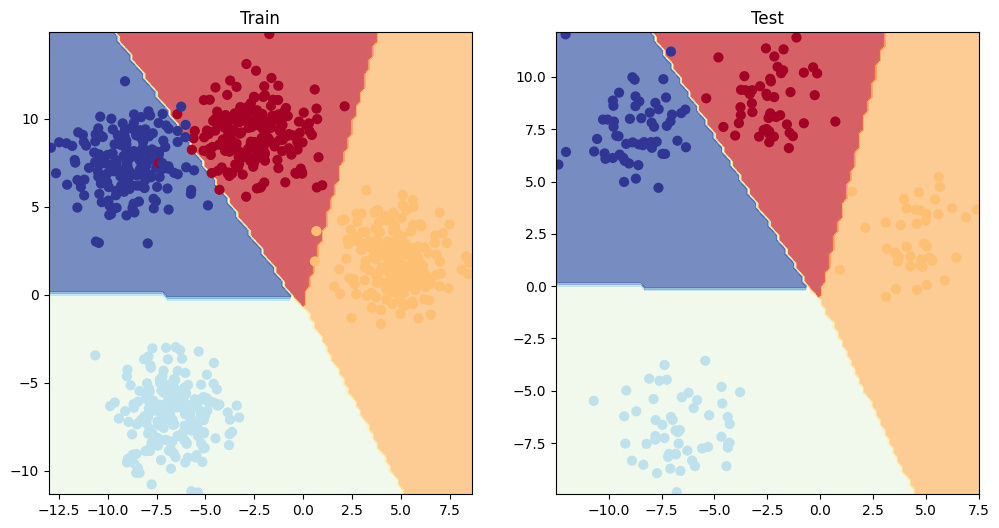

In [45]:
# Making and evaluating predictions with Pytorch multi-class model
model_4.eval()
with torch.inference_mode():
  y_logits = model_4 (X_blob_test).squeeze()
y_logits[:10]

y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]
y_blob_test

# Go from pred probs to pred labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:10]
y_blob_test

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)




# A few more classification metrics (to evaluate our classification model)
* Accuracy
   - torchmetrics.Accuracy()
   - sklearn.metrics.accuracy_score()
  Default metric for classification problems. Not the best for imbalanced classes.
* Precision
  - Beyond accuracy article
  - torchmetrics.Precision()
  - sklearn.metrics.precision_score()
  Higher precision leads to less false positives
* Recall
  - torchmetrics.recall()
  - sklearn.metrics.recall_score
  Higher recall leads to less false negatives
  Precision_recall tradeoff
* F1-score
  - torchmetrics.F1score()
  - sklearn.metrics.f1_score()
  Combination of precision and recall, usually a good overall metric for a classification model
* Confusion matrix
  torchmetrics.ConfusionMatrix()
  When comparing predictions to truth labels to see where model gets confused. Can be hard to use with large numbers of classes.
* Classification report
  - sklearn.metrics.classification_report()
  Puts all the metrics together

In [46]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 15.1 MB/s eta 0:00:00


In [49]:
from torchmetrics import Accuracy

# Setup metric
torchmetric_accuracy = Accuracy(task="multiclass", num_classes=4).to(device)

# Calculate accuracy
torchmetric_accuracy(y_preds, y_blob_test)

tensor(0.9950, device='cuda:0')